In [1]:
#importare pacchetti
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
#caricare csv e controllo importazione
inv=pd.read_csv(r"C:\Users\franc\OneDrive - Universita degli Studi Roma Tre\Desktop\Inventory_Status_clean.csv")

inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29058 entries, 0 to 29057
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   center_id           29058 non-null  int64  
 1   center_name         29058 non-null  object 
 2   center_latitude     29058 non-null  float64
 3   center_longitude    29058 non-null  float64
 4   product_id          29058 non-null  int64  
 5   product_name        29058 non-null  object 
 6   product_category    29058 non-null  object 
 7   product_department  29058 non-null  object 
 8   inventory_count     29058 non-null  int64  
 9   sold_count          29058 non-null  int64  
 10  available_stock     29058 non-null  int64  
 11  return_count        29058 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 2.7+ MB


In [4]:
#preview
inv.head()

,center_id,center_name,center_latitude,center_longitude,product_id,product_name,product_category,product_department,inventory_count,sold_count,available_stock,return_count
0,3,Houston TX,29.7604,-95.3698,16898,Quiksilver Waterman Men's On The Rise,Tops & Tees,Men,12,5,8,1
1,3,Houston TX,29.7604,-95.3698,9482,KEEN Women Bellingham Low Ultralite Sock,Socks & Hosiery,Women,13,6,9,2
2,3,Houston TX,29.7604,-95.3698,13863,Husky Animal Hat with Mittens,Accessories,Women,15,5,10,0
3,3,Houston TX,29.7604,-95.3698,25135,Volcom Men's Argyle Socks,Socks,Men,24,7,18,1
4,3,Houston TX,29.7604,-95.3698,11843,Wendy Glez Rose Cami Black,Intimates,Women,20,7,14,1


In [3]:
#duplicati
inv = inv.drop_duplicates()
#valori nulli
null_counts_per_column = inv.isnull().sum()
print(null_counts_per_column)


center_id             0
center_name           0
center_latitude       0
center_longitude      0
product_id            0
product_name          0
product_category      0
product_department    0
inventory_count       0
sold_count            0
available_stock       0
return_count          0
dtype: int64


In [14]:
#sostituzione 2 valori nulli
inv['product_name'].fillna('Not Specified', inplace=True)

In [22]:
#centri di distribuzione con stock basso
distribution_center_stats = inv.groupby('center_name').agg({
    'sold_count': 'sum',
    'return_count': 'sum',
    'available_stock': 'sum'
}).reset_index()

problematic_distribution_centers = distribution_center_stats[distribution_center_stats['available_stock'] <= 0]
print("Problematic distribution centers:")
print(problematic_distribution_centers)

Problematic distribution centers:
Empty DataFrame
Columns: [center_name, sold_count, return_count, available_stock]
Index: []


In [6]:
#dipartimento con maggiori accessi
department_counts = inv['product_department'].value_counts()

most_accessed_department = department_counts.idxmax()
access_count = department_counts.max()

print("Most accessed department:", most_accessed_department)
print("Access count:", access_count)

Most accessed department: Women
Access count: 15933


In [7]:
#controllo conteggi
check_result = inv['inventory_count'] == (inv['sold_count'] + inv['available_stock'] - inv['return_count'])
print(inv[~check_result])

Empty DataFrame
Columns: [center_id, center_name, center_latitude, center_longitude, product_id, product_name, product_category, product_department, inventory_count, sold_count, available_stock, return_count]
Index: []


In [8]:
#controllo prodotti con stock disponibile <=0
low_stock_products = inv[inv['available_stock'] <= 0]
print("Products with low available stock:")
print(low_stock_products)


Products with low available stock:
Empty DataFrame
Columns: [center_id, center_name, center_latitude, center_longitude, product_id, product_name, product_category, product_department, inventory_count, sold_count, available_stock, return_count]
Index: []


In [9]:
#categorie con disponibilità bassa
low_stock_categories = inv.groupby('product_category').filter(lambda x: x['available_stock'].sum() <= 0)
print("Categories with low or zero available stock:")
print(low_stock_categories)


Categories with low or zero available stock:
Empty DataFrame
Columns: [center_id, center_name, center_latitude, center_longitude, product_id, product_name, product_category, product_department, inventory_count, sold_count, available_stock, return_count]
Index: []


In [17]:
#prodotto maggiormente venduto al netto dei resi
inv['net_sold_count'] = inv['sold_count'] - inv['return_count']


product_with_highest_net_sold = inv.loc[inv['net_sold_count'].idxmax(), 'product_name']
highest_net_sold_count = inv['net_sold_count'].max()

print("Product Name with the Highest Net Sold Count:", product_with_highest_net_sold)
print("Highest Net Sold Count:", highest_net_sold_count)




Product Name with the Highest Net Sold Count: Diesel Men's Lagnum Leather Jacket
Highest Net Sold Count: 17


In [19]:
#prodotto peggiore al netto dei resi
min_net_sold_product = inv.loc[inv['net_sold_count'].idxmin(), 'product_name']
min_net_sold_value = inv['net_sold_count'].min()
print("Product with the Lowest Net Sold Count:")
print("Product Name:", min_net_sold_product)
print("Net Sold Count:", min_net_sold_value)

Product with the Lowest Net Sold Count:
Product Name: Fox Womens Juniors Eminent Pullover Sweater
Net Sold Count: 0


In [47]:
#centri di distribuzione in ordine di vendita
center_sold_counts = inv.groupby('center_name')['sold_count'].sum()

sorted_centers_sold = center_sold_counts.sort_values(ascending=False)


top_10_centers_sold = sorted_centers_sold.head(10)


print("Top 10 Centers in Terms of Selling:")
print(top_10_centers_sold)



Top 10 Centers in Terms of Selling:
center_name
Chicago IL                                     24315
Memphis TN                                     24253
Houston TX                                     22643
Mobile AL                                      18299
Los Angeles CA                                 17455
Philadelphia PA                                16817
Charleston SC                                  16652
Port Authority of New York/New Jersey NY/NJ    16346
New Orleans LA                                 13114
Savannah GA                                    11871
Name: sold_count, dtype: int64


In [23]:
#statistiche
mean_sold_count = inv['sold_count'].mean()

mean_return_count = inv['return_count'].mean()


print("Mean of sold_count:", mean_sold_count)
print("Mean of return_count:", mean_return_count)


Mean of sold_count: 6.227095885694612
Mean of return_count: 0.6302289550697194


Frequency distribution of product_name:
Wrangler Men's Premium Performance Cowboy Cut Jean                 8
True Religion Men's Ricky Straight Jean                            5
Fruit of the Loom Women's 6-Pack Crew Socks                        5
Thorlo Unisex Experia Running Sock                                 5
7 For All Mankind Men's Standard Classic Straight Leg Jean         5
                                                                  ..
Carhartt Men's Flex Tough Work Glove with Durable Rovenica Palm    1
Carhartt J291 Men's Denim Jean Jacket/Unlined                      1
Carhartt Women's Womens Tomboy Cardigan Sweater                    1
Carhartt Men's Midweight Cotton Union Suit                         1
La Leche League International Pullover Nursing Sports Bra          1
Name: product_name, Length: 27245, dtype: int64


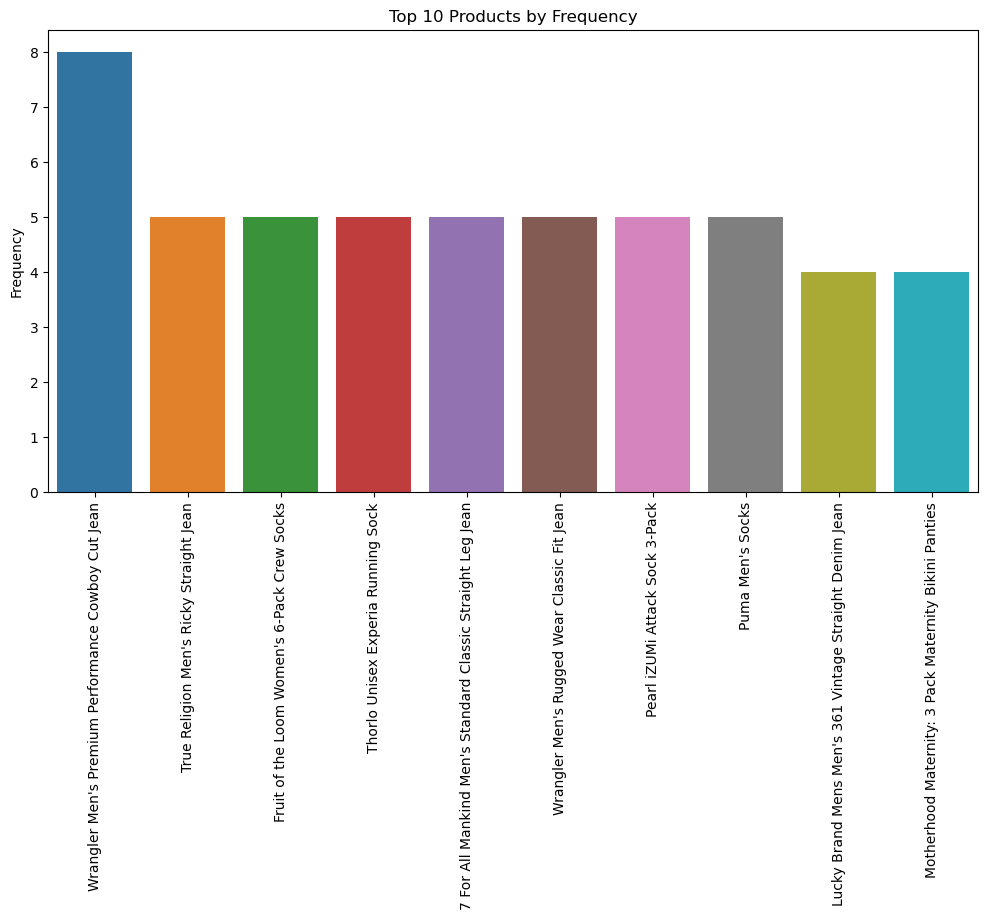

In [27]:
#distribuzione di frequenza nome prodotto
product_name_counts = inv['product_name'].value_counts()
print("Frequency distribution of product_name:")
print(product_name_counts)


#grafico a barre top 10 prodotti
plt.figure(figsize=(12, 6))
top_10_products = product_name_counts.head(10)
sns.barplot(x=top_10_products.index, y=top_10_products.values)

plt.ylabel('Frequency')
plt.title('Top 10 Products by Frequency')
plt.xticks(rotation=90)
plt.show()




Frequency distribution of product_category:
Intimates                        2357
Jeans                            1998
Tops & Tees                      1864
Fashion Hoodies & Sweatshirts    1861
Swim                             1795
Sleep & Lounge                   1769
Shorts                           1763
Sweaters                         1732
Accessories                      1555
Active                           1430
Outerwear & Coats                1418
Underwear                        1088
Pants                            1041
Dresses                           952
Socks                             905
Maternity                         895
Plus                              754
Suits & Sport Coats               738
Socks & Hosiery                   663
Pants & Capris                    609
Leggings                          560
Blazers & Jackets                 558
Skirts                            367
Suits                             187
Jumpsuits & Rompers               162
Clothi

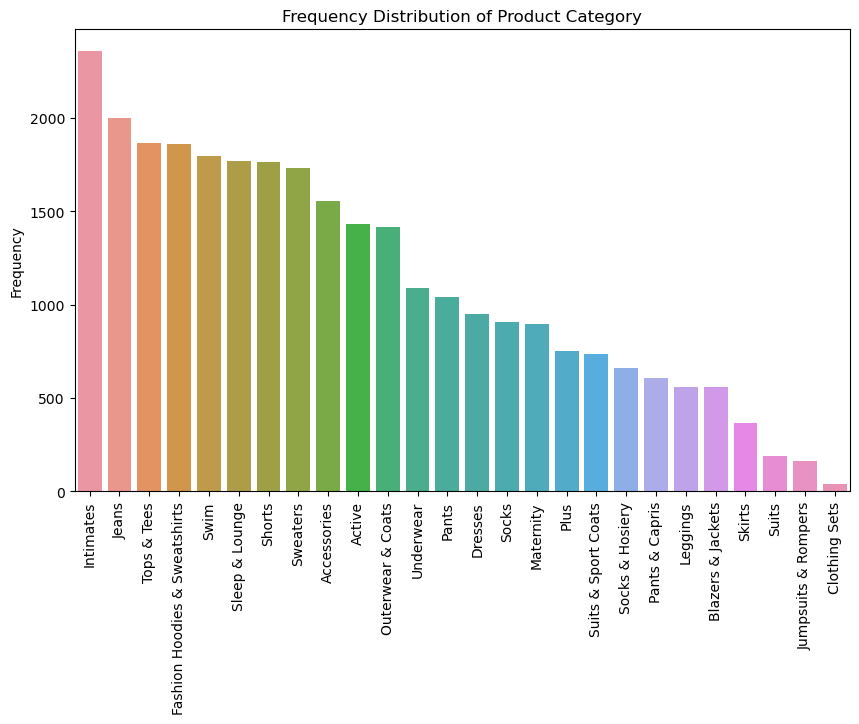

In [51]:
# distribuzione di frequenza per categorie di prodotto
product_category_counts = inv['product_category'].value_counts()
print("Frequency distribution of product_category:")
print(product_category_counts)

# grafico a barre categorie di prodotto
plt.figure(figsize=(10, 6))
sns.barplot(x=product_category_counts.index, y=product_category_counts.values)
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Product Category')
plt.xticks(rotation=90)
plt.show()



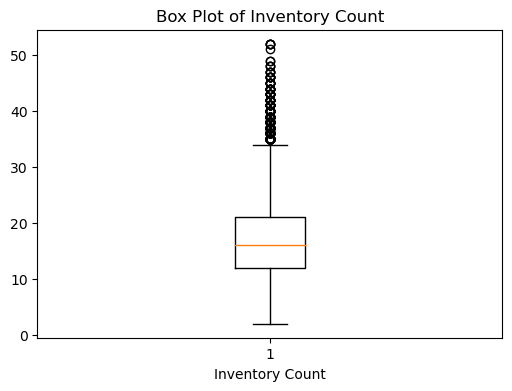

In [38]:
#outlier conteggio inventorio
plt.figure(figsize=(6, 4))
plt.boxplot(inv['inventory_count'])
plt.title('Box Plot of Inventory Count')
plt.xlabel('Inventory Count')
plt.show()





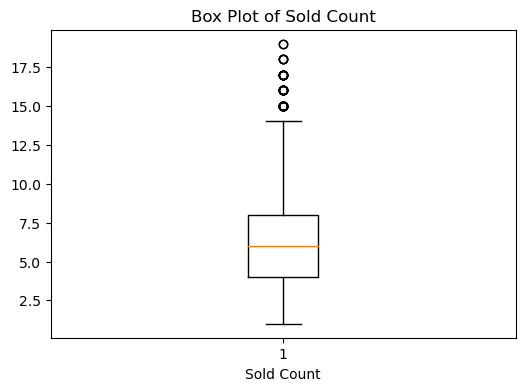

In [31]:
#outlier conteggio vendite
plt.figure(figsize=(6, 4))
plt.boxplot(inv['sold_count'])
plt.title('Box Plot of Sold Count')
plt.xlabel('Sold Count')
plt.show()

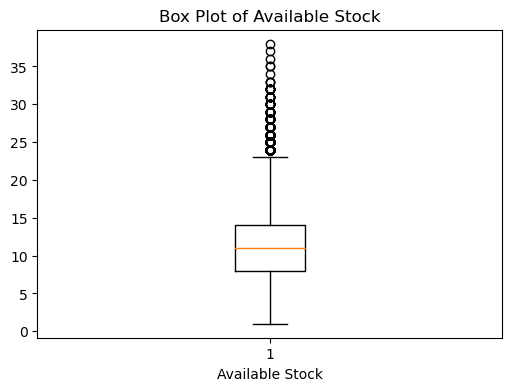

In [32]:
#outlier stock disponibile
plt.figure(figsize=(6, 4))
plt.boxplot(inv['available_stock'])
plt.title('Box Plot of Available Stock')
plt.xlabel('Available Stock')
plt.show()

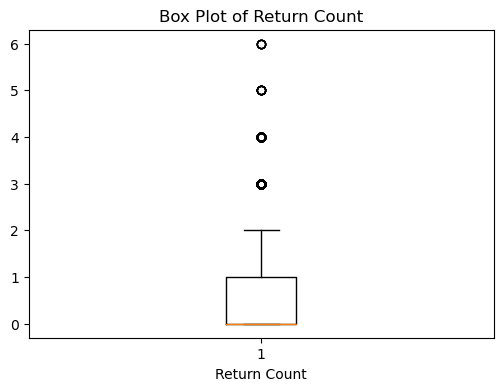

In [33]:
#outlier conteggio resi
plt.figure(figsize=(6, 4))
plt.boxplot(inv['return_count'])
plt.title('Box Plot of Return Count')
plt.xlabel('Return Count')
plt.show()

In [41]:
#correlazione positiva
correlation_sold_stock = inv['sold_count'].corr(inv['available_stock'])

print("Correlation between 'sold_count' and 'available_stock':", correlation_sold_stock)


Correlation between 'sold_count' and 'available_stock': 0.9119822547074137


In [56]:
#numero categorie uniche
num_unique_categories = inv['product_category'].nunique()
print("Number of Unique Product Categories:", num_unique_categories)



Number of Unique Product Categories: 26


In [15]:
inv.to_csv('Inventory_Status_clean.csv', index=False)


